## More on numpy, and matplotlib

### Review of masking

Suppose that `a` is a numpy array, and `b` is a numpy array of the *same shape* with `b.dtype == bool`.

Then `a[b]` is a numpy array with `1` axis. Its values consist of the values in `a` where `b` is `True`.

These values are arranged lexicographically according to their index.

假设 `a` 是一个 numpy 数组，而 `b` 是一个与 `b.dtype == bool` *相同形状*的 numpy 数组。

那么 `a[b]` 是一个带有 `1` 轴的 numpy 数组。 它的值由 `a` 中的值组成，其中 `b` 为 `True`。

这些值根据其索引按字典顺序排列。

Suppose that `a` is a numpy array, and `b` is a numpy array `b.dtype == np.bool`.

We can also make sense of `a[b]` whenever `b.ndim <= a.ndim` and `b.shape == a.shape[:len(b.shape)]`.

Then `a[b]` is a numpy array with `1 + (a.ndim - b.ndim)` axes.

假设 a 是一个 numpy 数组，b 是一个 numpy 数组 b.dtype == np.bool。

我们也可以在 `b.ndim <= a.ndim` 和 `b.shape == a.shape[:len(b.shape)]` 时理解 `a[b]`。

然后 `a[b]` 是一个带有 `1 + (a.ndim - b.ndim)` 轴的 numpy 数组。


I omitted talking about index arrays to avoid confusion. 

They are useful but you can almost always avoid them. 
However, I do like them and you can choose to read about them in NumPy.ipynb if you like.

为了避免混淆，我省略了索引数组的讨论。

它们很有用，但您几乎总是可以避免使用它们。
然而，我确实喜欢它们，如果你愿意，你可以选择在 NumPy.ipynb 中阅读它们。

### Index arrays

Suppose I want to permute an axis.

In [1]:
import numpy as np

a = np.fromfunction(lambda i0, i1, i2: 3000 + 100*i0 + 10*i1 + 1*i2, (2, 4, 5), dtype=np.int32)

print('a ==')
print(a)
print('')

print('a[...,[4,3,0,1,2]] ==')
print(a[...,[4,3,0,1,2]])
print('')

print('a[:,[3,0,2,1],:] ==')
print(a[:,[3,0,2,1],:])
print('')

a ==
[[[3000 3001 3002 3003 3004]
  [3010 3011 3012 3013 3014]
  [3020 3021 3022 3023 3024]
  [3030 3031 3032 3033 3034]]

 [[3100 3101 3102 3103 3104]
  [3110 3111 3112 3113 3114]
  [3120 3121 3122 3123 3124]
  [3130 3131 3132 3133 3134]]]

a[...,[4,3,0,1,2]] ==
[[[3004 3003 3000 3001 3002]
  [3014 3013 3010 3011 3012]
  [3024 3023 3020 3021 3022]
  [3034 3033 3030 3031 3032]]

 [[3104 3103 3100 3101 3102]
  [3114 3113 3110 3111 3112]
  [3124 3123 3120 3121 3122]
  [3134 3133 3130 3131 3132]]]

a[:,[3,0,2,1],:] ==
[[[3030 3031 3032 3033 3034]
  [3000 3001 3002 3003 3004]
  [3020 3021 3022 3023 3024]
  [3010 3011 3012 3013 3014]]

 [[3130 3131 3132 3133 3134]
  [3100 3101 3102 3103 3104]
  [3120 3121 3122 3123 3124]
  [3110 3111 3112 3113 3114]]]



We have 100 data points, each data is a vector of 10 real numbers.
So the data is of shape [100,10]

Suppose we want to select 5 samples from it.

l is a list of 5 random integers from 0 to 100.
data[l,...]

np.random.choice

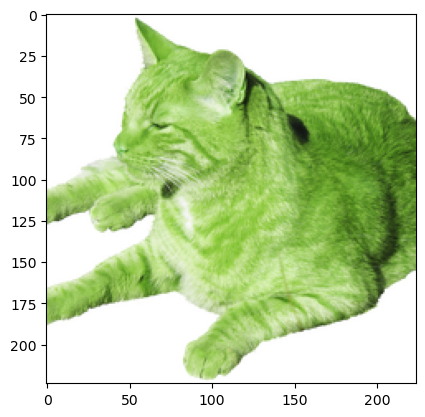

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('cat.png').copy()

img = img[...,[1,0,2]] # swap R and G using fancy indexing

# img[...,0], img[...,1] = img[...,1], img[...,0]  # totally not what we want - views can be dangerous
# img[...,0], img[...,1] = img[...,1], img[...,0]  # swapping twice should result in doing nothing, but...

plt.imshow(img)

## Examples of using fancy indexing and looking up new functions

What if we wanted to write efficient numpy code for the following code 

which goes through every pixel and sets the maximum and minimum RGB value to `0`?

In [3]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('cat.png')   

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        c = img[i,j]  # equivalent img[i,j,...] or img[i,j,:]
        # shape of c: (3,)

        # if c = [1,2,4], then k1 = 0, k2 = 2
        k1 = np.argmin(c) # https://numpy.org/doc/1.18/reference/generated/numpy.argmin.html
        k2 = np.argmax(c) # https://numpy.org/doc/1.18/reference/generated/numpy.argmax.html
        
        c[k1] = 0
        c[k2] = 0

plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'art.png'

(224, 224)


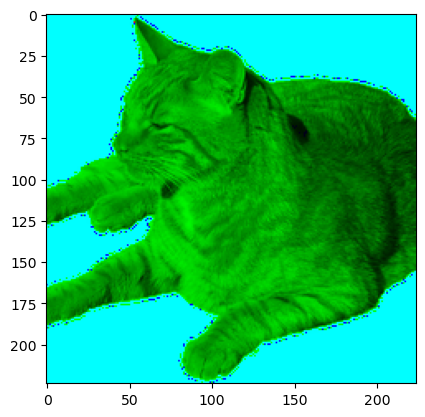

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('cat.png')             

argmin = np.argmin(img, axis = -1)         
argmax = np.argmax(img, axis = -1)         
print(argmin.shape)
print(argmin)


img[argmin == 0, 0] = 0       # using masking combined with normal indexing
img[argmin == 1, 1] = 0       # using masking combined with normal indexing
img[argmin == 2, 2] = 0       # using masking combined with normal indexing

img[argmax == 0, 0] = 0       # using masking combined with normal indexing
img[argmax == 1, 1] = 0       # using masking combined with normal indexing
img[argmax == 2, 2] = 0       # using masking combined with normal indexing

plt.imshow(img)

The next code produces a slightly different output. 

If the minimum is obtained twice, then `argmin` picks one of the indices where the minimum is obtained.

In the following code, if the minimum is obtained twice, then both values are set to `0`.

As a consequence, the image produced contains more black pixels.

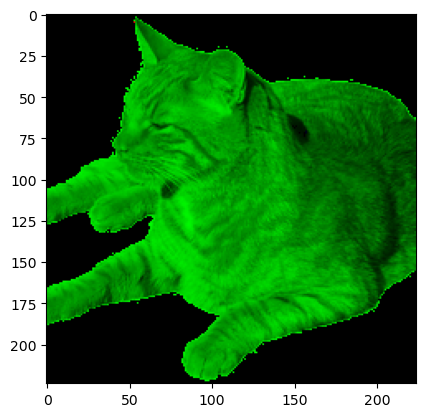

In [5]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('cat.png')   

amin = np.amin(img, axis = -1, keepdims = True)  
amax = np.amax(img, axis = -1, keepdims = True)  

img = np.where(img == amin, 0, img)  # https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
img = np.where(img == amax, 0, img)  # https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

plt.imshow(img)

## Matplotlib and pyplot

We will be working a lot with __matplotlib__ and __pyplot__, and its most basic function: plot(), which takes as input a list of x-coordinates and y-coordinates, and plots those points. In its most basic form, it plots them and connectes them by a line.

You may need to insert, at the beginning of the notebook the following magic:

%matplotlib inline

It will make your plot outputs appear and be stored within the notebook. It's not necessary if you are writing and running a python script.

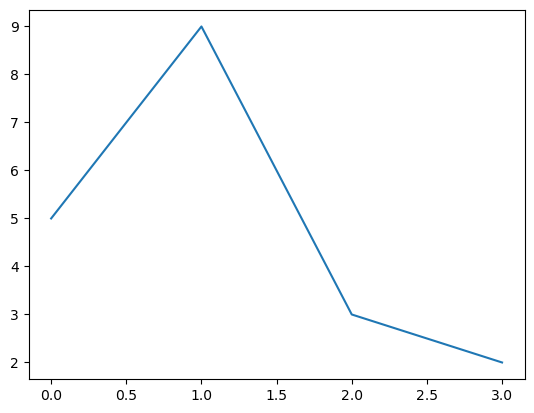

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0,1,2,3],[5,9,3,2])
plt.show()

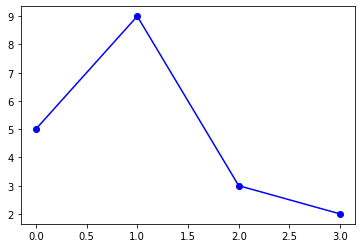

In [ ]:
# plt.plot([0,1,2,3],[5,9,3,2],'ro')
# plt.plot([0,1,2,3],[5,9,3,2],'ks')
# plt.plot([0,1,2,3],[5,9,3,2],'k-')
# plt.plot([0,1,2,3],[5,9,3,2],'k-.')
plt.plot([0,1,2,3],[5,9,3,2],'bo-')  # 'bo-' is type of line which means b:blue, o:circle, -line
plt.show()


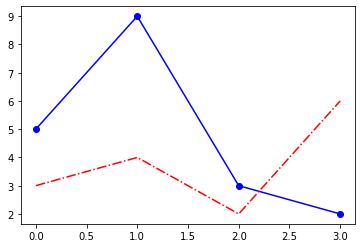

In [ ]:
x = [0,1,2,3]
y1 = [5,9,3,2]
y2 = [3,4,2,6]
plt.plot(x, y1,'bo-', x, y2, 'r-.')
plt.show()


We can also specify the linestyle. For example, we can ask for discrete points (o for bullets), and specify a color (r for red):

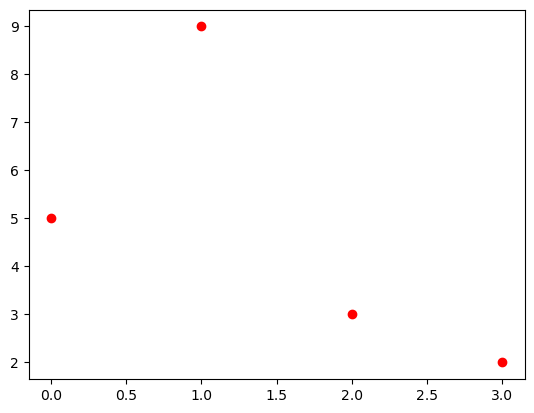

In [7]:
plt.plot([0,1,2,3],[5,9,3,2],'ro')
plt.show()

To make our plot more readable, we can change the axes range, and add a title and axis labels. We can also plot multiple plots in the same figure, by adding them to the same execution. For example:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


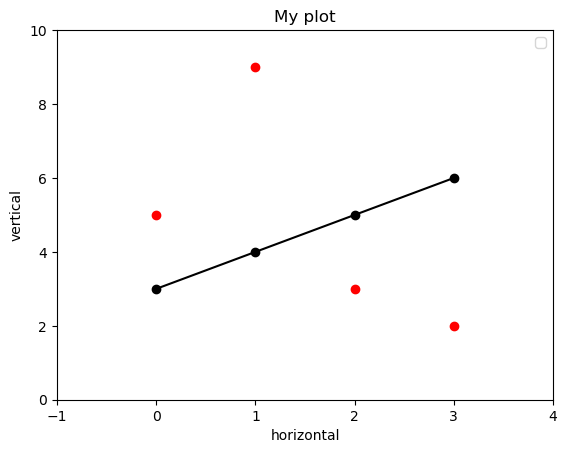

In [9]:
plt.plot([0,1,2,3],[5,9,3,2],'ro',[0,1,2,3],[3,4,5,6],'ko-')
plt.axis([-1,4,0,10])
plt.title('My plot')
plt.xlabel('horizontal')
plt.ylabel('vertical')
plt.legend()
plt.show()

### Example:
- Use __plt.plot( )__ to draw a sin(x) function. Do this by plotting many points, which together look like a smooth line.

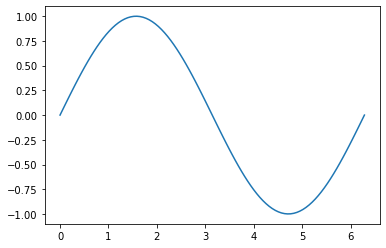

In [ ]:
import math
N = 100
dx = 2*math.pi/(N-1)
x_list = [i*dx for i in range(N)]
y_list = [math.sin(xi) for xi in x_list]
plt.plot(x_list, y_list)
plt.show()

Here is a much easier way to generate the same plot using __NumPy__:

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(0,1,10)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [ ]:
x = np.linspace(0,np.pi,10)
print(x)

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


In [ ]:
y = np.sin(x)
print(y)

[0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]


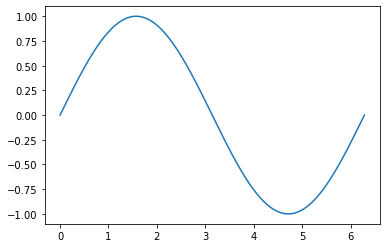

In [ ]:
N = 1000
x = np.linspace(0,2*np.pi,N)
y = np.sin(x)
plt.plot(x,y)
plt.show()

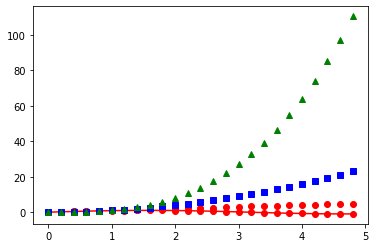

In [ ]:
# evenly sampled x-coordinates at 0.2 intervals
x = np.arange(0., 5., 0.2) # x is now a numpy array

# red dashes, blue squares and green triangles
plt.plot(x,np.sin(x),'ro-')
plt.plot(x, x, 'ro', x, x**2, 'bs', x, x**3, 'g^')
plt.show()

[0.  0.4 0.8 1.2 1.6]


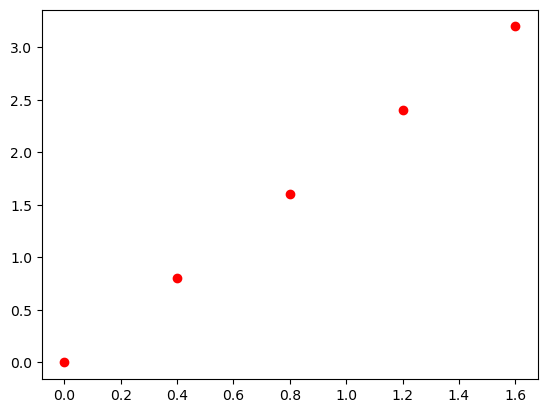

In [ ]:
x = np.linspace(0, 2, 5, endpoint = False)
print(x)
plt.plot(x, 2*x, 'ro')
plt.show()